REFERENCE FOR MODEL TRANING : https://github.com/roboflow/notebooks

In [ ]:
# Change the GPU in the Hardware acceleration section
# Check if the GPU is working or not
!nvidia-smi

Wed May 24 20:38:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os               # Using os library to navigate and change the file path
HOME = os.getcwd()      # set HOME path
print(HOME)             # print the HOME directory path

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20   # Install Ultralyticcs for using yolo model in future

from IPython import display        # Import library
display.clear_output()             # Clear ouput

import ultralytics                 # Import library
ultralytics.checks()               # Check if ultralytics is working properly or not

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO                    # Import yolo from ultralytics

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets                                                          # Make datasets directory
%cd {HOME}/datasets                                                             # Change Directory to dataset

!pip install roboflow                                                           # Install roboflow

from roboflow import Roboflow                                                   # Import Roboflow
rf = Roboflow(api_key="Qj9j0Iki4uPMr3yC0gMa")                                   # Request Roboflow API
project = rf.workspace("watch-7oofb").project("classify-type-of-watches")       # Select the workspace that we created at roboflow 
dataset = project.version(16).download("yolov8")                                # Select the version type of the model in this case we use version 16


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Classify-Type-of-watches-16 in yolov8:: 100%|██████████| 5096/5096 [00:01<00:00, 3148.03it/s]


In [ ]:
%cd {HOME}  # Change directory to HOME
# Train the model by using the dataset from roboflow set epochs equals to 35 and image size equal to 800
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=35 imgsz=800 plots=True 

/content
100% 21.5M/21.5M [00:04<00:00, 5.10MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Classify-Type-of-watches-16/data.yaml, epochs=35, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchsc

In [ ]:
!ls {HOME}/runs/detect/train/ # Check the file in this path

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch3425.jpg
events.out.tfevents.1684960858.a877435c6857.1071.0  train_batch3426.jpg
F1_curve.png					    train_batch3427.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content


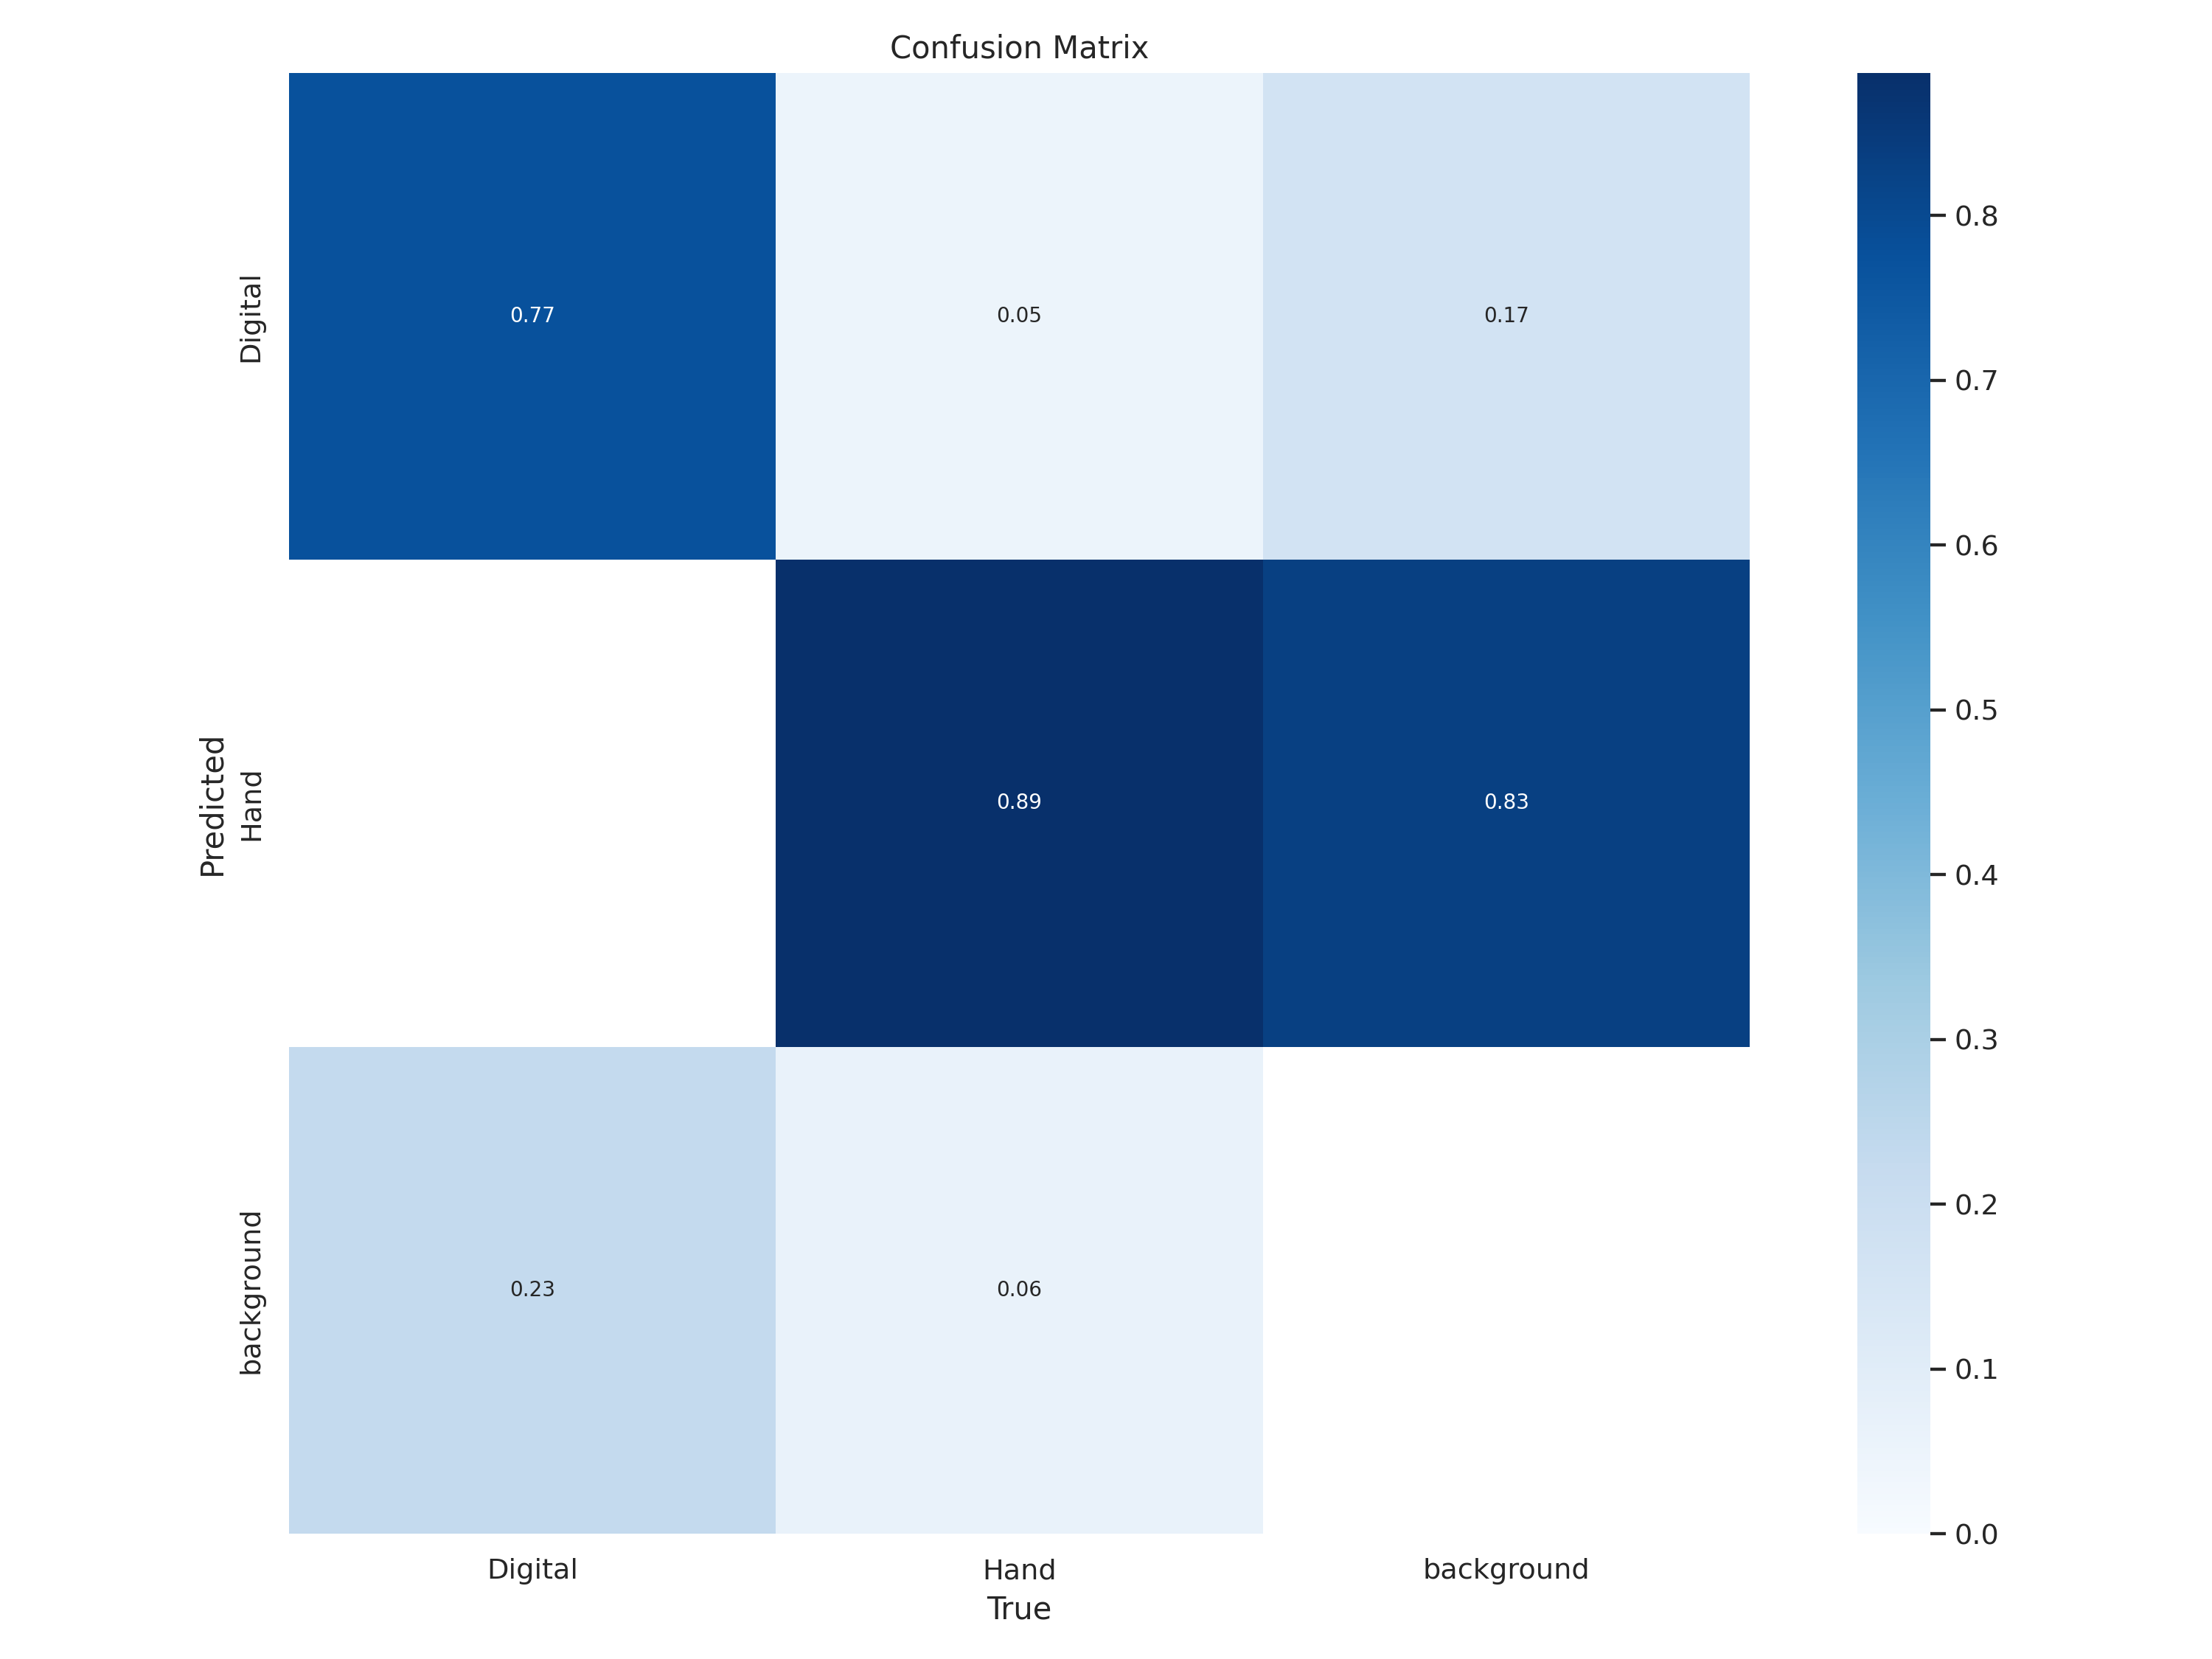

In [ ]:
%cd {HOME}                                                                      # Change directory to home
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)     # Plot the confusion matrix    

/content


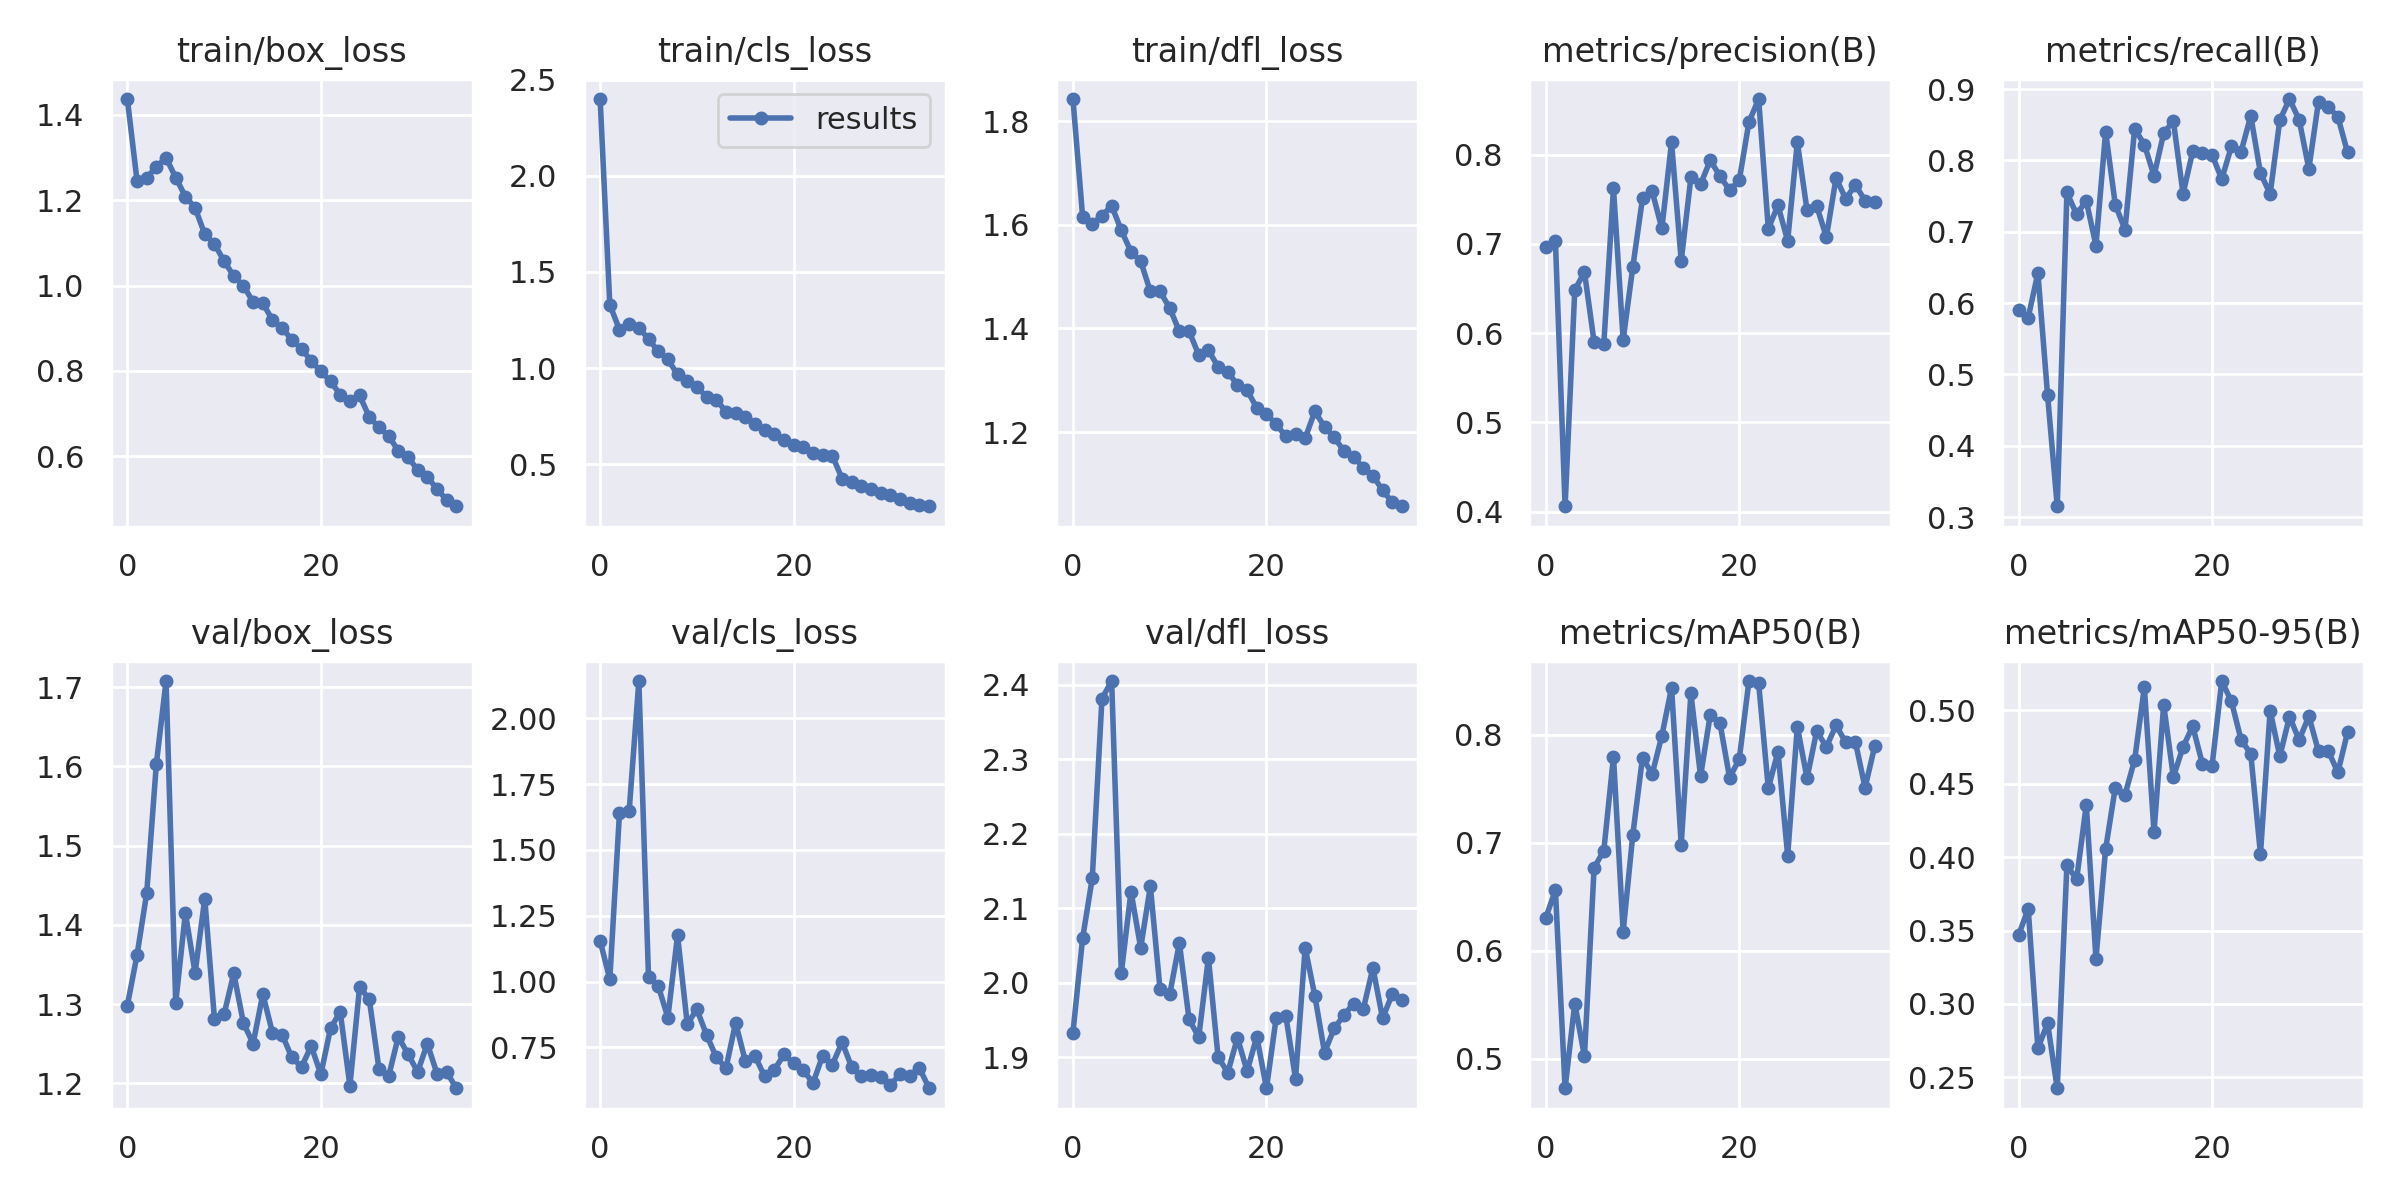

In [ ]:
%cd {HOME}                                                                      # Change directory to home
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)              # Plot results graph

/content


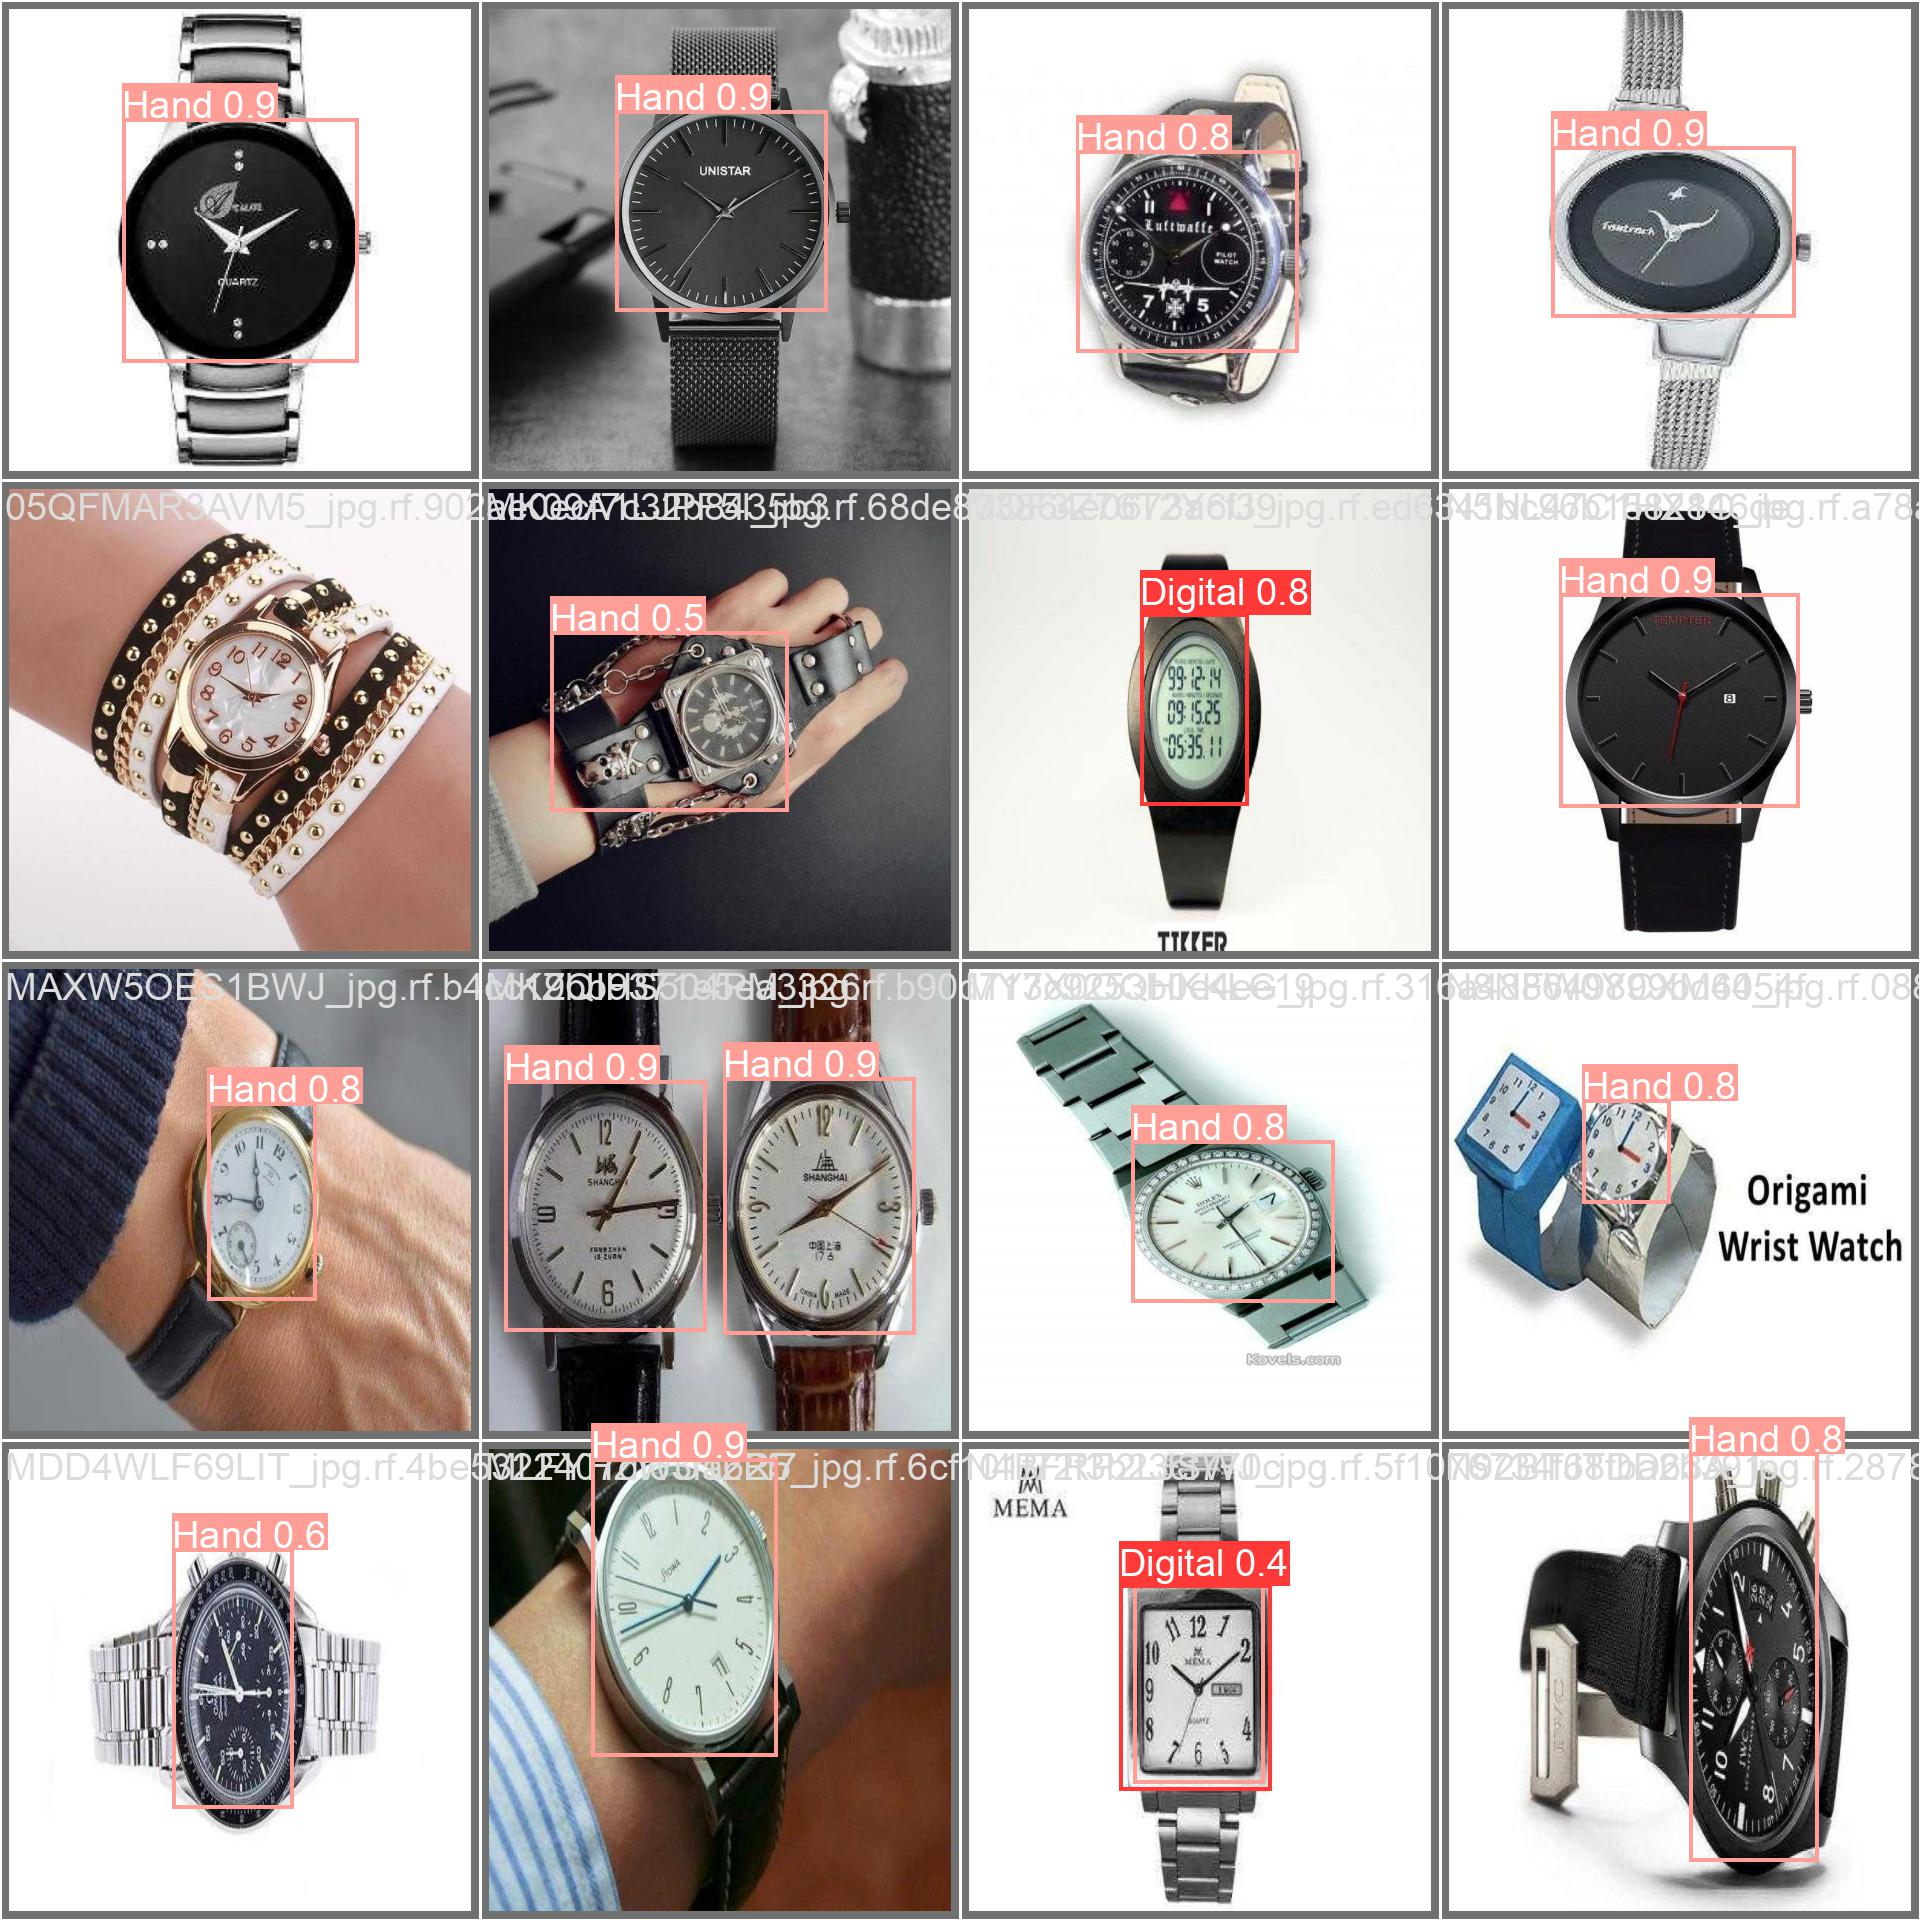

In [ ]:
%cd {HOME}                                                                       # Change directory to home
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)       # Print out the predicted validation dataset pictures

In [ ]:
%cd {HOME}  #Change directory to home
# Print out the model summary
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-24 21:43:04.443008: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 21:43:05.547810: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Classify-Type-of-watches-16/valid/labels.cache... 235 images, 0 backgrounds, 0 corrupt: 100% 235/235 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:07<00:00,  1.92it/s]
                   all        235        260      0.836      0.774       0.85      0.519
              

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/") # Export the dataset to roboflow (Store the prediction in cloud)

View the status of your deployment at: https://app.roboflow.com/watch-7oofb/classify-type-of-watches/deploy/16
Share your model with the world at: https://universe.roboflow.com/watch-7oofb/classify-type-of-watches/model/16


In [ ]:
from google.colab import drive     # Import drive
drive.mount('/content/drive')      # Mount this file in to colab in order to storees files such as best.py and graphs      

Mounted at /content/drive


DEPLOYED CODE

In [ ]:

# Import Libraries
import cv2
from ultralytics import YOLO
import supervision as sv
import numpy as np
import time
import pyttsx3

def main():

    cap           = cv2.VideoCapture(0)         # Set the input image as a camera

    model         = YOLO("best.pt")             # Set the model as a best.py

    synthesizer   = pyttsx3.init()              # initialize synthesizer from pyttsx3 library

    box_annotator = sv.BoxAnnotator(            # Set the border of the box
        thickness      = 2,                     # Set the thinkness of the box 
        text_thickness = 2,                     # set text thickness
        text_scale     = 1                      # Set text scale
    )

    text_announce = False                       # Set the text_annouce boolean as False (If True it will print You cannot wear this watch in the exam room)
    timer         = 0                           # Set initial timer as 0

    while True:                                                                 # Begin infinite loop
        ret, frame = cap.read()                                                 # store the image that is read by the camera as frame

        result     = model(frame, agnostic_nms=True)[0]                         # Using agnostic Non-Maximum Suppression during the inference process           
        detections = sv.Detections.from_yolov8(result)                          # Use Yolov8 to predict the model
        labels     = [                                                          # Store model name and 2 digit confidenece rate
            f"{model.model.names[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, _
            in detections
        ]

        start = time.time()                                                       # Initialize current time

        frame = box_annotator.annotate(                                           # Draw the box around the object                       
            scene      = frame,                                                   # Get image from the cap
            detections = detections,                                              # Detection
            labels     = labels                                                   # Labels the detection of the objet
        )    

        for detected in labels:                                                         # Loop in labels
            if "Digital" in detected:                                                   # Trigger when the model detected the digital watch
                text_announce = True                                                    # Set bool text_annouce as True
                timer = time.time()                                                     # Set time
                synthesizer.say("You cannot wear this watch in the exam room")          # Use pyttsx3 library to get voice from the string
                synthesizer.runAndWait()                                                # Wait for the sound to end
                synthesizer.stop()                                                      # Stop the sound

        if text_announce:
            close_text = time.time() - timer
            if close_text < 3:
                cv2.putText(frame, "The watch is not allowed in the exam.", (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)  # Use cv2 to put text on image

        
        cv2.imshow("Watch Classifier", frame)           # Show 

        if (cv2.waitKey(30) == 27):                     # trigger when the user press the 'q' button on keyboard
            break                                       # break the while loop

        print((1/(time.time()-start)), " fps")          # print fps of the camera


if __name__ == "__main__":                              # start the program
    main()                                              # Call function
